In [1]:
import os
import pandas as pd
import re
import numpy as np
from tqdm import tqdm
from ioh_xplainer import explainer
import pandas as pd

from ConfigSpace import ConfigurationSpace
from ConfigSpace.util import generate_grid
from IPython.display import display



data_file = "cma_es.pkl"
features = ['elitist', 'mirrored', 'base_sampler', 'weights_option', 'local_restart', 'step_size_adaptation']
df = pd.read_pickle(data_file)



cs = ConfigurationSpace({
    "elitist": list(map(str, df['elitist'].unique())), 
    "mirrored" : list(map(str, df['mirrored'].unique())), 
    "base_sampler" : list(map(str, df['base_sampler'].unique())), 
    "weights_option" : list(map(str, df['weights_option'].unique())), 
    "local_restart" : list(map(str, df['local_restart'].unique())), 
    "step_size_adaptation" : list(map(str, df['step_size_adaptation'].unique()))
})

print(cs)
print( df['dim'].unique())
cmaes_explainer = explainer(None, 
                 cs , 
                 algname="mod-CMA",
                 dims = [5,30],#, 10, 20, 40 
                 fids = np.arange(1,25), #,5
                 iids = len( df['iid'].unique()), #20 
                 reps = len( df['seed'].unique()), 
                 sampling_method = "grid",  #or random
                 grid_steps_dict = {},
                 sample_size = None,  #only used with random method
                 budget = 10000, #10000
                 seed = 1,
                 verbose = True)


cmaes_explainer.load_results(data_file)
#for feature in features:
#    cmaes_explainer.df[feature] = cmaes_explainer.df[feature].astype("category")
df = cmaes_explainer.performance_stats()
display(df.style.bar(cmap='viridis'))

#cmaes_explainer.plot(partial_dependence=False, best_config=False)
#print(de_explainer.stats[5])
#df = de_explainer.stats[5]
#print(df.to_latex(index=False,
#                  float_format="{:.2f}".format,
#                  multicolumn_format = "c"
#))  


/home/bas/repos/ioh-explainer/env/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/bas/repos/ioh-explainer/env/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/bas/repos/ioh-explainer/env/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/bas/repos/ioh-explainer/env/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
IProgress not found. Please update jupyter and ipywidgets. See

Configuration space object:
  Hyperparameters:
    base_sampler, Type: Categorical, Choices: {sobol, gaussian, halton}, Default: sobol
    elitist, Type: Categorical, Choices: {True, False}, Default: True
    local_restart, Type: Categorical, Choices: {nan, IPOP, BIPOP}, Default: nan
    mirrored, Type: Categorical, Choices: {mirrored pairwise, nan, mirrored}, Default: mirrored pairwise
    step_size_adaptation, Type: Categorical, Choices: {csa, psr}, Default: csa
    weights_option, Type: Categorical, Choices: {default, equal, 1/2^lambda}, Default: default

[30  5]


Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


In [2]:
from IPython.display import display

#df = de_explainer.behaviour_stats()
#df.style.bar(cmap='viridis')

#do it for f1 and f5

df = cmaes_explainer.behaviour_stats(per_fid=False)
display(df.style.bar(cmap='viridis'))

#df = cmaes_explainer.behaviour_stats(per_fid=True)
#display(df.style.bar(cmap='viridis'))



In [3]:
cmaes_explainer.to_latex_report(filename="cma_es")

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has ch

<Figure size 800x470 with 0 Axes>

In [21]:
# categorical_columns = cmaes_explainer.df.dtypes[cmaes_explainer.df.dtypes == 'category'].index.to_list()
# categorical_columns

# df = cmaes_explainer.df
# for cat in categorical_columns:
#     print(cat)
#     df[cat] = df[cat].astype('category')
#     print(df[cat].unique())
#     print(df[cat].cat.codes.unique())

mirrored
['mirrored pairwise', NaN, 'mirrored']
Categories (2, object): ['mirrored', 'mirrored pairwise']
[ 1 -1  0]
base_sampler
['sobol', 'gaussian', 'halton']
Categories (3, object): ['gaussian', 'halton', 'sobol']
[2 0 1]
weights_option
['default', 'equal', '1/2^lambda']
Categories (3, object): ['1/2^lambda', 'default', 'equal']
[1 2 0]
local_restart
[NaN, 'IPOP', 'BIPOP']
Categories (2, object): ['BIPOP', 'IPOP']
[-1  1  0]
step_size_adaptation
['csa', 'psr']
Categories (2, object): ['csa', 'psr']
[0 1]


The figure layout has changed to tight
The figure layout has changed to tight


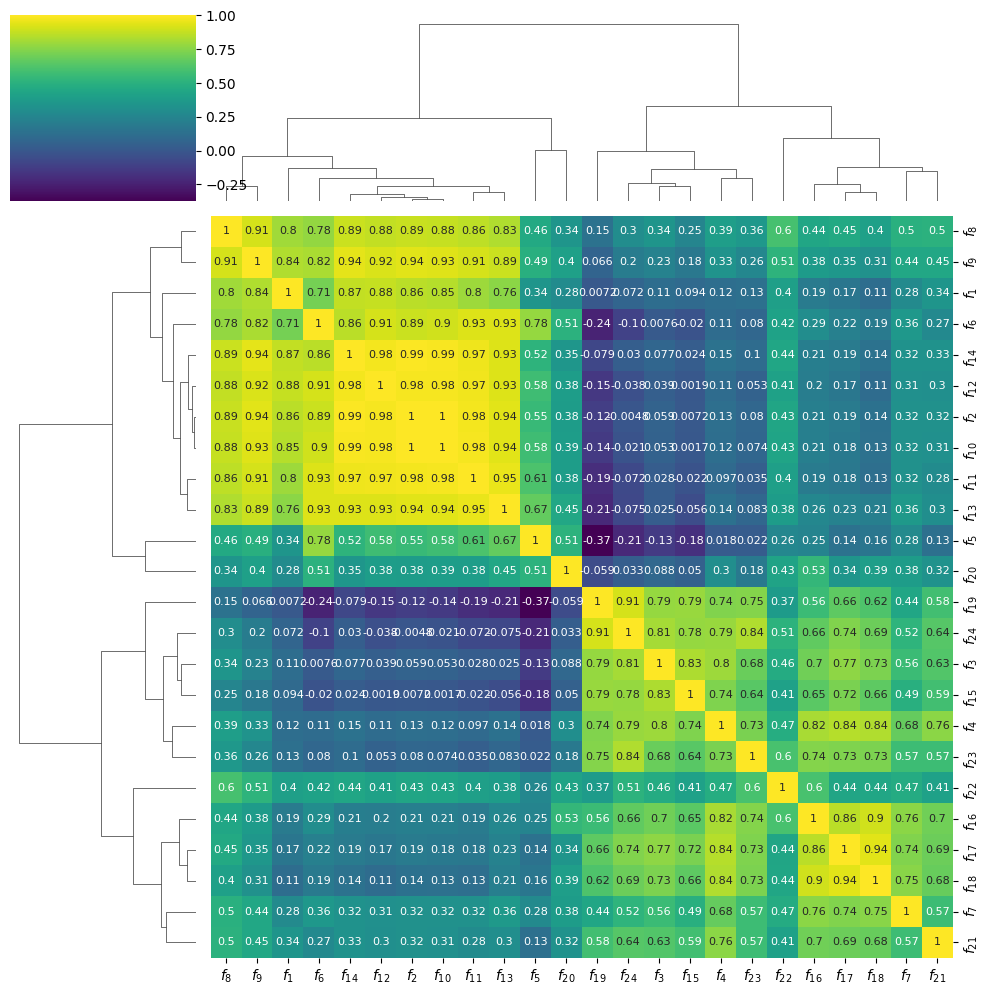

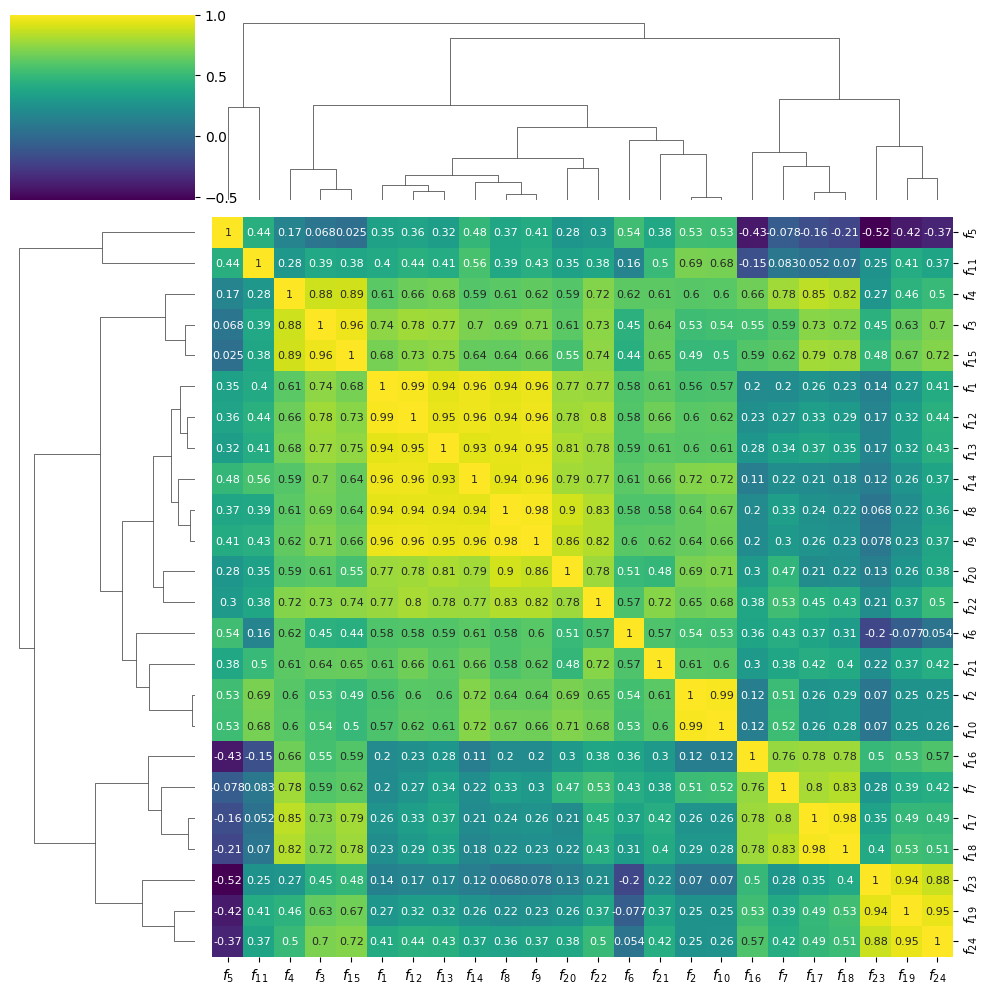

In [42]:
#Correlation of configuration ranking per function
import seaborn as sns
import matplotlib.pyplot as plt


df = cmaes_explainer.df
for dim in cmaes_explainer.dims:
    fid_auc_matrix = []
    for fid in cmaes_explainer.fids:
        df_dim_fid = df[(df['dim']==dim) & (df['fid'] == fid)]
        
        fid_auc_matrix.append(df_dim_fid.groupby(features)['auc'].mean())

    fid_auc_matrix = np.array(fid_auc_matrix).T

    df_matrix = pd.DataFrame(fid_auc_matrix, columns=[f"$f_{{{i}}}$" for i in np.arange(1,25)])
    corr = df_matrix.corr()
    g = sns.clustermap(corr, 
                    method = 'complete', 
                    cmap   = 'viridis', 
                    annot  = True, 
                    annot_kws = {'size': 8})
    plt.tight_layout()
    plt.savefig(f"cma-es-clustermap-{dim}d.pdf")
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

In [24]:
#Correlation of configuration ranking per function
df = cmaes_explainer.df
df_dim_fid = df[(df['dim']==5) & (df['fid'] == 2) & (df['seed'] == 1) & (df['iid'] == 1)]
df_dim_fid

,fid,iid,dim,seed,elitist,mirrored,base_sampler,weights_option,local_restart,step_size_adaptation,auc
4871,2,1,5,1,False,mirrored,gaussian,default,BIPOP,psr,9037.037037
7251,2,1,5,1,False,mirrored,sobol,default,IPOP,csa,9672.839506
9631,2,1,5,1,False,mirrored,halton,equal,BIPOP,csa,9179.012346
12011,2,1,5,1,False,mirrored pairwise,gaussian,default,NaN,psr,9141.975309
16771,2,1,5,1,True,NaN,halton,default,IPOP,psr,9456.790123
...,...,...,...,...,...,...,...,...,...,...,...
753381,2,1,5,1,True,mirrored,sobol,equal,NaN,csa,9703.703704
760521,2,1,5,1,True,mirrored,halton,equal,BIPOP,psr,9697.530864
761711,2,1,5,1,False,mirrored pairwise,gaussian,equal,IPOP,csa,2777.777778
762901,2,1,5,1,False,NaN,gaussian,1/2^lambda,IPOP,psr,9395.061728
